In [1]:
import tensorflow as tf
import numpy as np
import vgg19
import matplotlib.pyplot as plt
import utils

In [2]:
#img = tf.placeholder(tf.float32, [None, 224, 224, 3])
i_max = 2

device = '/cpu:0'
show = True

In [3]:
def gram_matrix(F, N, M):
    Ft = tf.reshape(F, (M, N))
    return tf.matmul(tf.transpose(Ft), Ft)

In [4]:
def main_loss_function(x):
    return

In [5]:
def create_noise_image(width, height):
    image = np.random.uniform(-32,32, (1, height, width, 3)).astype('float32')
    
    if(show == True):
        plt.imshow(image.reshape(height,width,3))
        plt.show()
    return image

In [6]:
def get_image(path):
    #load image
    img_input = utils.load_image(path)
    img = img_input.reshape((1, 224, 224, 3))
    
    #show image
    if(show == True):
        plt.imshow(img_input.reshape((224,224,3)))
        plt.show()
        
    return img

In [7]:
def get_layers(image):      
    #vgg
    vgg = vgg19.Vgg19()
    
    with tf.name_scope("content_vgg"):
        vgg.build(image)

    layers = [vgg.pool4, vgg.pool3, vgg.pool2, vgg.pool1, vgg.conv1_1]
    
    return layers

In [8]:
def get_gram_loss(target_layers, input_layers):
    gram_losses = []
    #go through layers
    for tl, il in zip(target_layers, input_layers):
        #get dimensions
        dimensions = tl.get_shape().as_list()
        size = dimensions[3]*dimensions[2]*dimensions[1]
        
        #get gram
        target_gram = gram_matrix(tl, dimensions[3], dimensions[2]*dimensions[1])
        input_gram = gram_matrix(il, dimensions[3], dimensions[2]*dimensions[1])
        
        #get losses
        gram_losses.append(2 * tf.nn.l2_loss(target_gram - input_gram) / size)
    
    #get gram_loss
    gram_loss = tf.reduce_sum(gram_losses).eval()
    
    print(gram_losses)
    
    return gram_loss

In [9]:
def get_loss(target_layers, input_layers):
    loss = 0
    losses = []
    
    #gram loss
    gram_loss = get_gram_loss(target_layers, input_layers) 
    
    
    #get histogram matrices
    
    
    

    return gram_loss

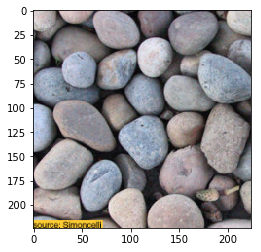

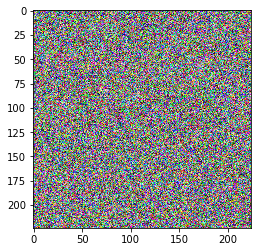

/home/rwjoverwater/in4015/vgg19.npy
npy file loaded
build model started
build model finished: 0s
/home/rwjoverwater/in4015/vgg19.npy
npy file loaded
build model started
build model finished: 0s


InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder' with dtype float and shape [1,224,224,3]
	 [[Node: Placeholder = Placeholder[dtype=DT_FLOAT, shape=[1,224,224,3], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'Placeholder', defined at:
  File "/home/rwjoverwater/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/rwjoverwater/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/rwjoverwater/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/rwjoverwater/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/rwjoverwater/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/home/rwjoverwater/anaconda3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/rwjoverwater/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/home/rwjoverwater/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/rwjoverwater/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/rwjoverwater/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/rwjoverwater/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/rwjoverwater/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/rwjoverwater/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/rwjoverwater/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/rwjoverwater/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/home/rwjoverwater/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/rwjoverwater/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/rwjoverwater/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/rwjoverwater/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/rwjoverwater/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-10-f338dfdf3353>", line 5, in <module>
    input_image = tf.placeholder(tf.float32, [1, 224, 224, 3])
  File "/home/rwjoverwater/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 1507, in placeholder
    name=name)
  File "/home/rwjoverwater/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 1997, in _placeholder
    name=name)
  File "/home/rwjoverwater/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 768, in apply_op
    op_def=op_def)
  File "/home/rwjoverwater/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2336, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/rwjoverwater/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1228, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder' with dtype float and shape [1,224,224,3]
	 [[Node: Placeholder = Placeholder[dtype=DT_FLOAT, shape=[1,224,224,3], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


In [10]:
with tf.device(device):
    sess = tf.InteractiveSession()
        
    #placeholders
    input_image = tf.placeholder(tf.float32, [1, 224, 224, 3])
    
    #load style image
    input_img = get_image("./test_data/pebbles.jpg")
    #create target image
    target_img = (create_noise_image(224, 224))
        
    #fill feed dictionary
    feed = {input_image: input_img}
                 
    #create variables                 
    target = tf.Variable(target_img, tf.float32)
            
    #input vgg
    style_layers = get_layers(input_image)
    #target vgg
    target_layers = get_layers(target)
    
    #get losses
    loss = get_loss(target_layers, style_layers)
    


In [ ]:
    
    #handlers
    optimizer = tf.train.GradientDescentOptimizer(0.5)
    minimize = optimizer.minimize(loss)
    
    #init
    sess.run(tf.global_variables_initializer())

In [ ]:
    for i in range(i_max):
        
        #optimize step
        sess.run(minimize, feed_dict = feed)
        
        #print loss
        print(sess.run(loss, feed_dict = feed))
        
        
        #show image
        if(show == True):
            plt.imshow(target.eval())
            plt.show()
